# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results,on="Mouse ID", how='left')

# Display the data table for preview
merged_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(20)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
          35           1
q633      15           1
          5            1
          10           1
q610      10           1
q633      20           1
          25           1
q610      15           1
q597      45           1
q610      5            1
dtype: int64

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter = merged_df['Mouse ID'] != 'g989'
work_df = merged_df.loc[filter].reset_index(drop=True)

In [11]:
# Checking the number of mice in the clean DataFrame.
work_df['Mouse ID'].nunique()

248

In [13]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


## Summary Statistics

In [16]:
drugs = work_df['Drug Regimen'].unique()
drugs

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [18]:
columns = ['mean','median','variance','standard_deviation','sem']

In [20]:
mean = work_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = work_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = work_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = work_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = work_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()


stats = { 'mean': mean, 'median': median, 'variance': variance, 'standard_deviation': std, 'sem': sem}

In [22]:
stat_df = pd.DataFrame(data=stats,index=drugs,columns=columns)
stat_df.head(15)

,mean,median,variance,standard_deviation,sem
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [25]:
x=work_df['Drug Regimen'].value_counts()

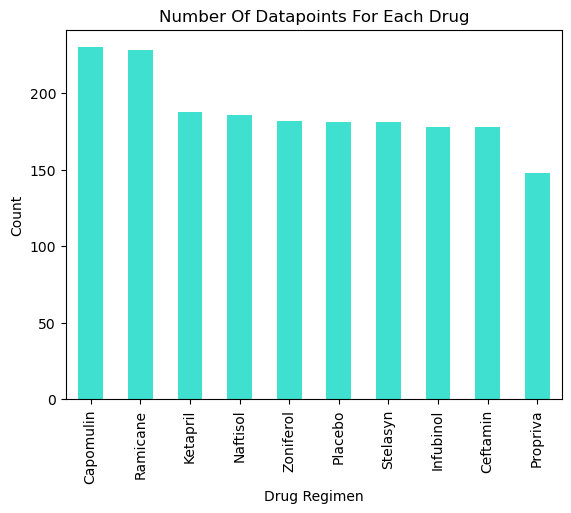

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
work_df['Drug Regimen'].value_counts().plot(kind='bar',title='Number Of Datapoints For Each Drug',ylabel='Count',color='turquoise')
plt.show()

In [29]:
plt_data = work_df['Drug Regimen'].value_counts()

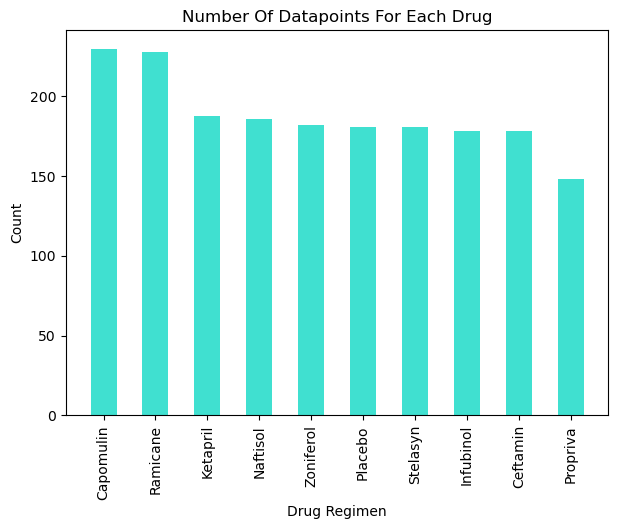

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt_data = work_df['Drug Regimen'].value_counts()
x = plt_data.index
y = plt_data.values

plt.figure(figsize=(7,5))
plt.bar(x,y,color='turquoise',width=.5)

# customize

plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title('Number Of Datapoints For Each Drug')
plt.xticks(rotation=90)
plt.show()

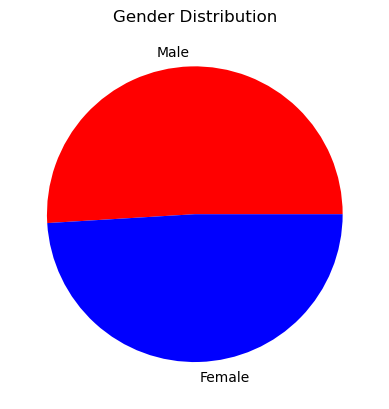

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
work_df['Sex'].value_counts().plot(kind='pie',title='Gender Distribution',colors=['red','blue'],ylabel='')
plt.show()

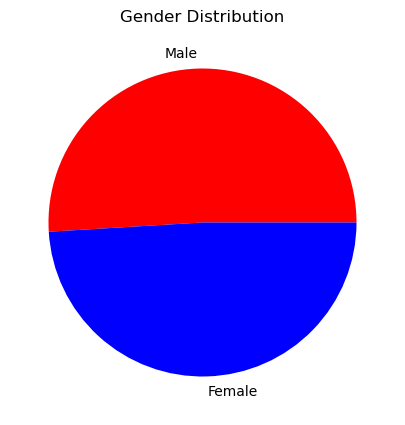

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = work_df['Sex'].value_counts()
y = pie_data.index
x = pie_data.values

plt.figure(figsize=(7,5))
plt.pie(x,labels=y,colors=['red','blue'])

# customize

plt.title('Gender Distribution')

plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

filter = work_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])

filt_df = work_df.loc[filter]

dropped_df = filt_df.drop_duplicates(subset='Mouse ID',keep='last').reset_index(drop=True)
dropped_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1


In [60]:
dropped_df['Drug Regimen'].value_counts()

Drug Regimen
Ramicane     25
Capomulin    25
Infubinol    25
Ceftamin     25
Name: count, dtype: int64

In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds


for index, row in dropped_df.iterrows():
    if row[1] == 'Capomulin':
        capomulin.append(row[6])
    if row[1] == 'Ramicane':
        ramicane.append(row[6])
    if row[1] == 'Infubinol':
        infubinol.append(row[6])
    if row[1] == 'Ceftamin':
        ceftamin.append(row[6])


data = {'capomulin':capomulin,'ramicane':ramicane,'infubinol':infubinol,'ceftamin':ceftamin}

sorted_df = pd.DataFrame(data)
sorted_df.describe()

C:\Users\16164\AppData\Local\Temp\ipykernel_22904\2448248611.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[1] == 'Capomulin':
C:\Users\16164\AppData\Local\Temp\ipykernel_22904\2448248611.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[1] == 'Ramicane':
C:\Users\16164\AppData\Local\Temp\ipykernel_22904\2448248611.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ramicane.append(row[6])
C:\Users\16164\AppD

,capomulin,ramicane,infubinol,ceftamin
count,25.000000,25.000000,25.000000,25.000000
mean,36.667568,36.191390,58.178246,57.753977
std,5.715188,5.671539,8.602957,8.365568
min,23.343598,22.050126,36.321346,45.000000
25%,32.377357,31.560470,54.048608,48.722078
50%,38.125164,36.561652,60.165180,59.851956
75%,40.159220,40.659006,65.525743,64.299830
max,47.685963,45.220869,72.226731,68.923185


In [52]:
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   capomulin  25 non-null     float64
 1   ramicane   25 non-null     float64
 2   infubinol  25 non-null     float64
 3   ceftamin   25 non-null     float64
dtypes: float64(4)
memory usage: 932.0 bytes


In [50]:
vals = sorted_df.describe()

In [62]:
iqr_capomulin = vals.capomulin[6] - vals.capomulin[4]
iqr_ramicane = vals.ramicane[6] - vals.ramicane[4]
iqr_infubinol = vals.infubinol[6] - vals.infubinol[4]
iqr_ceftamin = vals.ceftamin[6] - vals.ceftamin[4]

print(f'The IQR of Capomulin Tumour volume is {iqr_capomulin}')
print(f'The IQR of Ramicane Tumour volume is {iqr_ramicane}')
print(f'The IQR of Infubinol Tumour volume is {iqr_infubinol}')
print(f'The IQR of Ceftamin Tumour volume is {iqr_ceftamin}')

The IQR of Capomulin Tumour volume is 7.781863460000004
The IQR of Ramicane Tumour volume is 9.098536719999998
The IQR of Infubinol Tumour volume is 11.477135160000003
The IQR of Ceftamin Tumour volume is 15.577752179999997


C:\Users\16164\AppData\Local\Temp\ipykernel_22904\431113009.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iqr_capomulin = vals.capomulin[6] - vals.capomulin[4]
C:\Users\16164\AppData\Local\Temp\ipykernel_22904\431113009.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iqr_ramicane = vals.ramicane[6] - vals.ramicane[4]
C:\Users\16164\AppData\Local\Temp\ipykernel_22904\431113009.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

In [66]:
for value in sorted_df.capomulin:
    if value > (vals.capomulin[6] + 1.5*(iqr_capomulin)):
        print(f"{value} is an outlier for capomulin")
    if value < (vals.capomulin[4] - 1.5*(iqr_capomulin)):
        print(f"{value} is an outlier for capomulin")

for value in sorted_df.ramicane:
    if value > (vals.ramicane[6] + 1.5*(iqr_ramicane)):
        print(f"{value} is an outlier or ramicane")
    if value < (vals.ramicane[4] - 1.5*(iqr_ramicane)):
        print(f"{value} is an outlier for ramicane")

for value in sorted_df.infubinol:
    if value > (vals.infubinol[6] + 1.5*(iqr_infubinol)):
        print(f"{value} is an outlier for infubinol")
    if value < (vals.infubinol[4] - 1.5*(iqr_infubinol)):
        print(f"{value} is an outlier for infubinol")

for value in sorted_df.ceftamin:
    if value > (vals.ceftamin[6] + 1.5*(iqr_ceftamin)):
        print(f"{value} is an outlier for ceftamin")
    if value < (vals.ceftamin[4] - 1.5*(iqr_ceftamin)):
        print(f"{value} is an outlier for ceftamin")

36.3213458 is an outlier for infubinol


C:\Users\16164\AppData\Local\Temp\ipykernel_22904\3659948969.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if value > (vals.capomulin[6] + 1.5*(iqr_capomulin)):
C:\Users\16164\AppData\Local\Temp\ipykernel_22904\3659948969.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if value < (vals.capomulin[4] - 1.5*(iqr_capomulin)):
C:\Users\16164\AppData\Local\Temp\ipykernel_22904\3659948969.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

Text(0, 0.5, 'Volume (mm^3)')

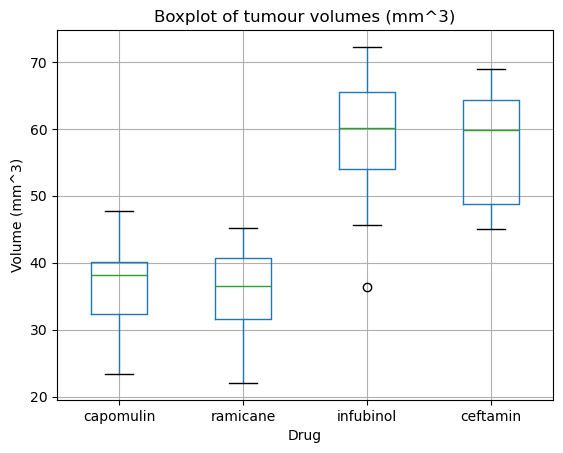

In [76]:
sorted_df.boxplot()
plt.title('Boxplot of tumour volumes (mm^3)')
plt.xlabel('Drug')
plt.ylabel('Volume (mm^3)')

## Line and Scatter Plots

In [96]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (s185)
filter_l = work_df['Mouse ID'] == 's185'
line_df = work_df.loc[filter_l].reset_index(drop=True)
line_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0
5,s185,Capomulin,Female,3,17,25,33.949940,0
6,s185,Capomulin,Female,3,17,30,32.959671,1
7,s185,Capomulin,Female,3,17,35,28.328531,1
8,s185,Capomulin,Female,3,17,40,25.472143,1
9,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor volume (mm^3)')

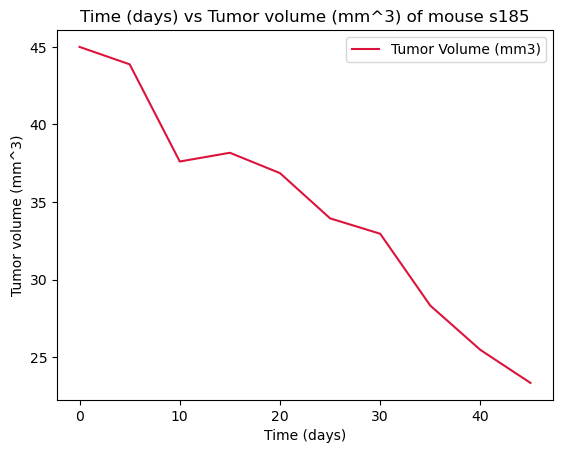

In [116]:
line_df.plot.line(x='Timepoint',y='Tumor Volume (mm3)', color='crimson')
plt.title('Time (days) vs Tumor volume (mm^3) of mouse s185')
plt.xlabel('Time (days)')
plt.ylabel('Tumor volume (mm^3)')

In [120]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
filter_s = dropped_df['Drug Regimen'] == 'Capomulin'
scatter_df = dropped_df.loc[filter_s].reset_index(drop=True)
scatter_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3
5,y793,Capomulin,Male,17,17,45,31.896238,2
6,r554,Capomulin,Female,8,17,45,32.377357,3
7,m957,Capomulin,Female,3,19,45,33.329098,1
8,t565,Capomulin,Female,20,17,45,34.455298,0
9,i738,Capomulin,Female,23,20,45,37.311846,2


Text(0.5, 1.0, 'Scatter plot of Weight vs Tumor Volume (mm3)')

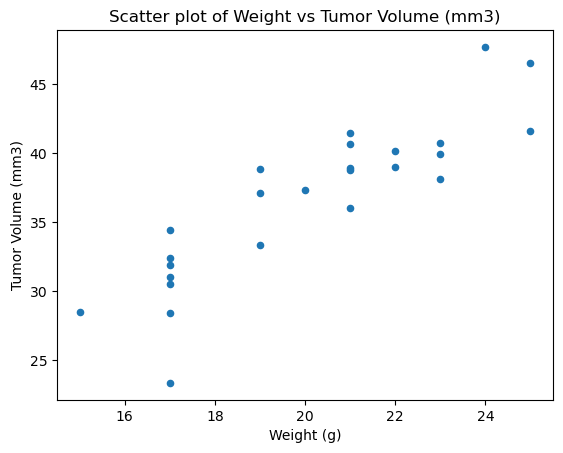

In [128]:
scatter_df.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')
plt.title('Scatter plot of Weight vs Tumor Volume (mm3)')

## Correlation and Regression

The r-squared is: 0.7686134812138998


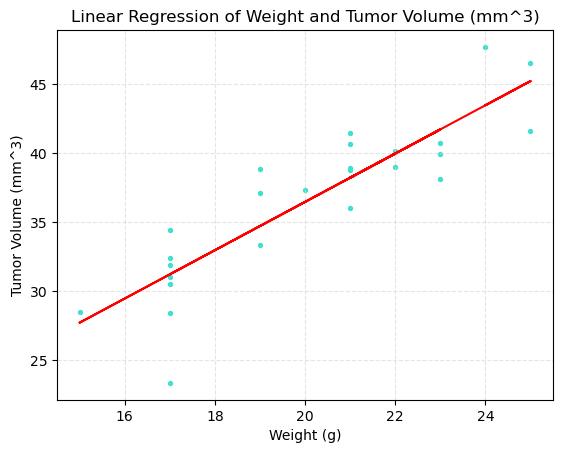

In [152]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# makes the line of best fit
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

x_values = scatter_df['Weight (g)']
y_values = scatter_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, 8, color='turquoise')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm^3)')
plt.title('Linear Regression of Weight and Tumor Volume (mm^3)')
plt.grid(color="lightgrey", linestyle="--", alpha=0.6)

print(f"The r-squared is: {rvalue**2}")
plt.show()